In [1]:
!pip install pymannkendall

In [2]:
!pip install pyhomogeneity

In [3]:
import pymannkendall as mk
import pyhomogeneity as hg
import numpy as np 
import pandas as pd

# Annual Dataset

## MK Test

In [3]:
path = 'clean_annual_dataset.csv'

# Loading the dataset
annual_df = pd.read_csv(path)

# Separate all the stations to perform MK test
stations = {}
for i in annual_df.index :
    key = str(annual_df.loc[i,'lat']) + "(--)" + str(annual_df.loc[i,'lon'])
    if key in stations :
        stations[key]['precip_pattern'].append(annual_df.loc[i,'precip'])
        stations[key]['count'] += 1
    else :
        stations[key] = {}
        stations[key]['altitude'] = annual_df.loc[i,'altitude']
        stations[key]['precip_pattern'] = [annual_df.loc[i,'precip']]
        stations[key]['count'] = 1
#print(stations)
print(len(stations))

# Perform MK Test
mk_final_trends = {'increasing':0, 'decreasing':0, 'no trend': 0}
for i in stations :
    data = stations[i]['precip_pattern']
    trend, h, p, z, Tau, s, var_s, slope, intercept = mk.original_test(data)
    stations[i]['trend'] = trend
    stations[i]['hypothesis'] = h
    stations[i]['p-value'] = p
    stations[i]['slope'] = slope
    mk_final_trends[trend] += 1
    #print(trend, " based on ", stations[i]['count'], " observations.")
print(mk_final_trends)

# Results breakdown : class1 = 0–200 m, class2 = 200–2000 m, and class3 = 2000+ m
final_results = {
    'class_1': {
        'increasing': 0,
        'decreasing': 0,
        'no trend': 0  
    },
    'class_2': {
        'increasing': 0,
        'decreasing': 0,
        'no trend': 0  
    },
    'class_3': {
        'increasing': 0,
        'decreasing': 0,
        'no trend': 0  
    }
}

for i in stations :
    if stations[i]['altitude'] < 200 :
        final_results['class_1'][stations[i]['trend']] += 1
    elif stations[i]['altitude'] < 2000 :
        final_results['class_2'][stations[i]['trend']] += 1
    elif stations[i]['altitude'] >= 2000 :
        final_results['class_3'][stations[i]['trend']] += 1
print("FINAL RESULTS :", final_results)

2310
{'increasing': 88, 'decreasing': 1083, 'no trend': 1139}
FINAL RESULTS : {'class_1': {'increasing': 0, 'decreasing': 526, 'no trend': 215}, 'class_2': {'increasing': 30, 'decreasing': 304, 'no trend': 508}, 'class_3': {'increasing': 58, 'decreasing': 253, 'no trend': 416}}


## MMK Test as given by Yang and Wue in 2004

In [4]:
path = 'clean_annual_dataset.csv'

# Loading the dataset
annual_df = pd.read_csv(path)

# Separate all the stations to perform MMK test (as given by yang and wue 2004)
stations = {}
for i in annual_df.index :
    key = str(annual_df.loc[i,'lat']) + "(--)" + str(annual_df.loc[i,'lon'])
    if key in stations :
        stations[key]['precip_pattern'].append(annual_df.loc[i,'precip'])
        stations[key]['count'] += 1
    else :
        stations[key] = {}
        stations[key]['altitude'] = annual_df.loc[i,'altitude']
        stations[key]['precip_pattern'] = [annual_df.loc[i,'precip']]
        stations[key]['count'] = 1
#print(stations)
print(len(stations))

# Perform MMK Test
mk_final_trends = {'increasing':0, 'decreasing':0, 'no trend': 0}
for i in stations :
    data = stations[i]['precip_pattern']
    trend, h, p, z, Tau, s, var_s, slope, intercept = mk.pre_whitening_modification_test(data)
    stations[i]['trend'] = trend
    stations[i]['hypothesis'] = h
    stations[i]['p-value'] = p
    stations[i]['slope'] = slope
    mk_final_trends[trend] += 1
    #print(trend, " based on ", stations[i]['count'], " observations.")
print(mk_final_trends)

# Results breakdown : class1 = 0–200 m, class2 = 200–2000 m, and class3 = 2000+ m
final_results = {
    'class_1': {
        'increasing': 0,
        'decreasing': 0,
        'no trend': 0  
    },
    'class_2': {
        'increasing': 0,
        'decreasing': 0,
        'no trend': 0  
    },
    'class_3': {
        'increasing': 0,
        'decreasing': 0,
        'no trend': 0  
    }
}

for i in stations :
    if stations[i]['altitude'] < 200 :
        final_results['class_1'][stations[i]['trend']] += 1
    elif stations[i]['altitude'] < 2000 :
        final_results['class_2'][stations[i]['trend']] += 1
    elif stations[i]['altitude'] >= 2000 :
        final_results['class_3'][stations[i]['trend']] += 1
print("FINAL RESULTS :", final_results)

2310
{'increasing': 47, 'decreasing': 827, 'no trend': 1436}
FINAL RESULTS : {'class_1': {'increasing': 0, 'decreasing': 392, 'no trend': 349}, 'class_2': {'increasing': 24, 'decreasing': 219, 'no trend': 599}, 'class_3': {'increasing': 23, 'decreasing': 216, 'no trend': 488}}


In [ ]:
## Sen's slope Test

In [11]:
path = 'clean_annual_dataset.csv'

# Loading the dataset
annual_df = pd.read_csv(path)

# Separate all the stations to perform MMK test (as given by yang and wue 2004)
stations = {}
for i in annual_df.index :
    key = str(annual_df.loc[i,'lat']) + "(--)" + str(annual_df.loc[i,'lon'])
    if key in stations :
        stations[key]['precip_pattern'].append(annual_df.loc[i,'precip'])
        stations[key]['count'] += 1
    else :
        stations[key] = {}
        stations[key]['altitude'] = annual_df.loc[i,'altitude']
        stations[key]['precip_pattern'] = [annual_df.loc[i,'precip']]
        stations[key]['count'] = 1
#print(stations)
print("No. of stations = ", len(stations))

# Perform Sen's slope Test
for i in stations :
    data = stations[i]['precip_pattern']
    slope, intercept = mk.sens_slope(data)
    stations[i]['slope'] = slope
    stations[i]['intercept'] = intercept

# Results breakdown : class1 = 0–200 m, class2 = 200–2000 m, and class3 = 2000+ m
final_results = {
    'class_1': {
        'slope': 0,
        'count':0
    },
    'class_2': {
        'slope': 0,
        'count':0
    },
    'class_3': {
        'slope': 0,
        'count':0
    }
}

for i in stations :
    if stations[i]['altitude'] < 200 :
        final_results['class_1']['slope'] += stations[i]['slope']
        final_results['class_1']['count'] += 1
    elif stations[i]['altitude'] < 2000 :
        final_results['class_2']['slope'] += stations[i]['slope']
        final_results['class_2']['count'] += 1
    elif stations[i]['altitude'] >= 2000 :
        final_results['class_3']['slope'] += stations[i]['slope']
        final_results['class_3']['count'] += 1
print("FINAL RESULTS :", final_results)
for i in final_results :
    print(i, final_results[i]['slope']/final_results[i]['count'])
    print("\n")

No. of stations =  2310
FINAL RESULTS : {'class_1': {'slope': -9225.502755851681, 'count': 741}, 'class_2': {'slope': -4086.311170606323, 'count': 842}, 'class_3': {'slope': -1798.692563461573, 'count': 727}}
class_1 -12.450071195481351


class_2 -4.853101152739101


class_3 -2.474130073537239




## Pettit Test

In [7]:
path = 'clean_annual_dataset.csv'

# Loading the dataset
annual_df = pd.read_csv(path)


# Calculating average precipitation of each year for each class
# Results breakdown : class1 = 0–200 m, class2 = 200–2000 m, and class3 = 2000+ m
final_results = {
    'class_1': {
        'avg_precip':[],
        'temp_sum': 0,
        'count':0
    },
    'class_2': {
        'avg_precip':[],
        'temp_sum': 0,
        'count':0
    },
    'class_3': {
        'avg_precip':[],
        'temp_sum': 0,
        'count':0
    }
}

years = []
for i in range(1983,2021):
    years.append(str(i))

for yr in years :
    for i in annual_df.index :
        if annual_df.loc[i,'datetime'][:4] == yr : 
            if annual_df.loc[i,'altitude'] < 200 :
                final_results['class_1']['temp_sum'] += annual_df.loc[i,'precip']
                final_results['class_1']['count'] += 1
            elif annual_df.loc[i,'altitude'] < 2000 :
                final_results['class_2']['temp_sum'] += annual_df.loc[i,'precip']
                final_results['class_2']['count'] += 1
            else :
                final_results['class_3']['temp_sum'] += annual_df.loc[i,'precip']
                final_results['class_3']['count'] += 1
                
    final_results['class_1']['avg_precip'].append(final_results['class_1']['temp_sum']/final_results['class_1']['count'])
    final_results['class_2']['avg_precip'].append(final_results['class_2']['temp_sum']/final_results['class_2']['count'])
    final_results['class_3']['avg_precip'].append(final_results['class_3']['temp_sum']/final_results['class_3']['count'])
    final_results['class_1']['temp_sum'], final_results['class_1']['count'] = 0, 0
    final_results['class_2']['temp_sum'], final_results['class_2']['count'] = 0, 0
    final_results['class_3']['temp_sum'], final_results['class_3']['count'] = 0, 0
            
    

for i in ['class_1', 'class_2', 'class_3'] :
    data = final_results[i]['avg_precip']
    h, cp, p, U, mu = hg.pettitt_test(data)
    print("Class Name = ", i)
    print("Hypothesis", h)
    print("p-value", p)
    print("Change year = ", 1983+cp-1) #cuz start year is 1983 and cp is indexed from 1 
    print("Mean values before and after change point =", mu)
    print("\n")

# For entire basin :
basin = {
    'avg_precip':[],
    'temp_sum': 0,
    'count':0
} 

for yr in years :
    for i in annual_df.index :
        if annual_df.loc[i,'datetime'][:4] == yr : 
            basin['temp_sum'] += annual_df.loc[i,'precip']
            basin['count'] += 1
           
    basin['avg_precip'].append(basin['temp_sum']/basin['count'])
    basin['temp_sum'], basin['count'] = 0, 0
    
data = basin['avg_precip']
h, cp, p, U, mu = hg.pettitt_test(data)
print("Class Name = Entire Basin")
print("Hypothesis", h)
print("p-value", p)
print("Change year = ", 1983+cp-1) #cuz start year is 1983 and cp is indexed from 1 
print("Mean values before and after change point =", mu)
print("\n")

Class Name =  class_1
Hypothesis True
p-value 0.00015
Change year =  2000
Mean values before and after change point = mean(mu1=1812.7349799737594, mu2=1553.8955875850204)


Class Name =  class_2
Hypothesis True
p-value 0.00055
Change year =  1999
Mean values before and after change point = mean(mu1=1298.6433853898457, mu2=1165.2707075381743)


Class Name =  class_3
Hypothesis True
p-value 0.006
Change year =  2004
Mean values before and after change point = mean(mu1=933.7430863555085, mu2=861.827649718879)


Class Name = Entire Basin
Hypothesis True
p-value 5e-05
Change year =  2000
Mean values before and after change point = mean(mu1=1346.3076606545412, mu2=1198.8704874127707)




## Visualizations 

In [9]:
df = pd.DataFrame(data, columns=['avg_precipitation'])

In [10]:
df['year'] = years

In [11]:
df.head()

,avg_precipitation,year
0,1392.513586,1983
1,1503.760318,1984
2,1453.008500,1985
3,1234.035738,1986
4,1321.636406,1987


In [35]:
import matplotlib.pyplot as plt

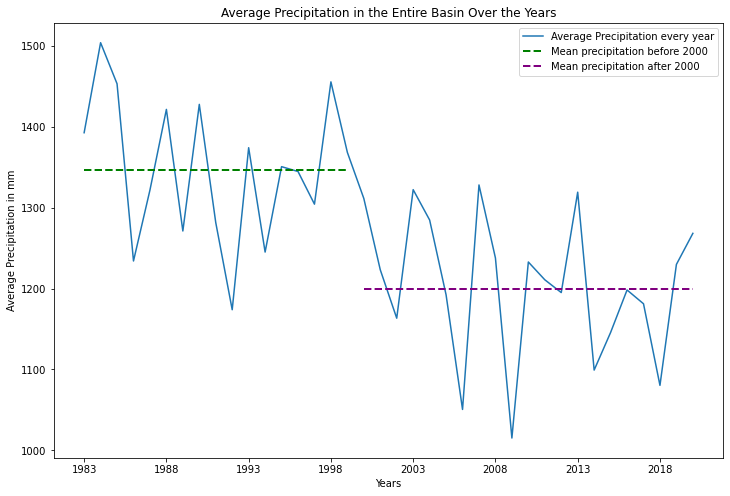

In [82]:
# Entire Basin - Average precipitation before and after change point 
after_change_x = []
after_change_y = []
before_change_x = []
before_change_y = []
for i in years :
    if int(i) >= 1983+cp-1 :
        after_change_x.append(i)
        after_change_y.append(mu[1])
    else :
        before_change_x.append(i)
        before_change_y.append(mu[0])
df.plot(x = 'year', y = 'avg_precipitation', 
        title ='Average Precipitation in the Entire Basin Over the Years', 
        xlabel = 'Years', ylabel = 'Average Precipitation in mm',
        figsize=(12,8))
plt.plot(before_change_x, before_change_y, color='green', lw=2, ls='--', label="Mean precipitation before 2000")
plt.plot(after_change_x, after_change_y, color='purple', lw=2, ls='--', label="Mean precipitation after 2000")
plt.legend(['Average Precipitation every year', 'Mean precipitation before 2000', 'Mean precipitation after 2000'])
plt.savefig("Entire Basin.pdf")

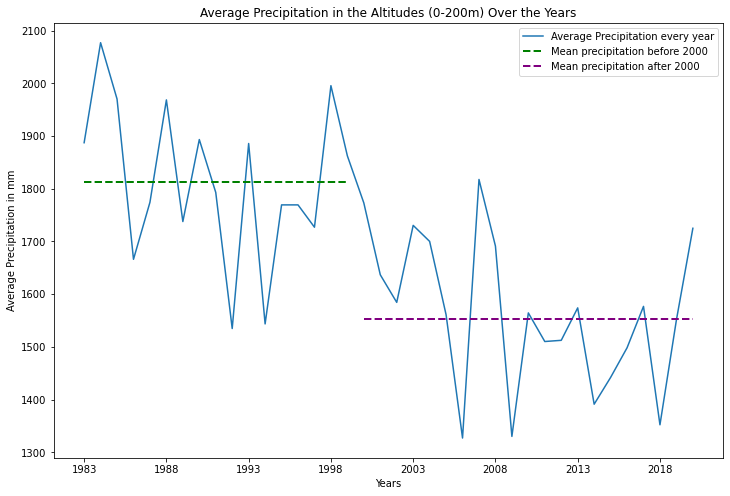

In [85]:
# Elevation (0-200m) - Average precipitation before and after change point 
data = final_results['class_1']['avg_precip']
h, cp, p, U, mu = hg.pettitt_test(data)

df = pd.DataFrame(final_results['class_1']['avg_precip'], columns=['avg_precipitation'])
df['year'] = years


after_change_x = []
after_change_y = []
before_change_x = []
before_change_y = []
for i in years :
    if int(i) >= 1983+cp-1 :
        after_change_x.append(i)
        after_change_y.append(mu[1])
    else :
        before_change_x.append(i)
        before_change_y.append(mu[0])
df.plot(x = 'year', y = 'avg_precipitation', 
        title ='Average Precipitation in the Altitudes (0-200m) Over the Years', 
        xlabel = 'Years', ylabel = 'Average Precipitation in mm',
        figsize=(12,8))
plt.plot(before_change_x, before_change_y, color='green', lw=2, ls='--', label="Mean precipitation before 2000")
plt.plot(after_change_x, after_change_y, color='purple', lw=2, ls='--', label="Mean precipitation after 2000")
plt.legend(['Average Precipitation every year', 'Mean precipitation before 2000', 'Mean precipitation after 2000'])
plt.savefig("Class_1.pdf")

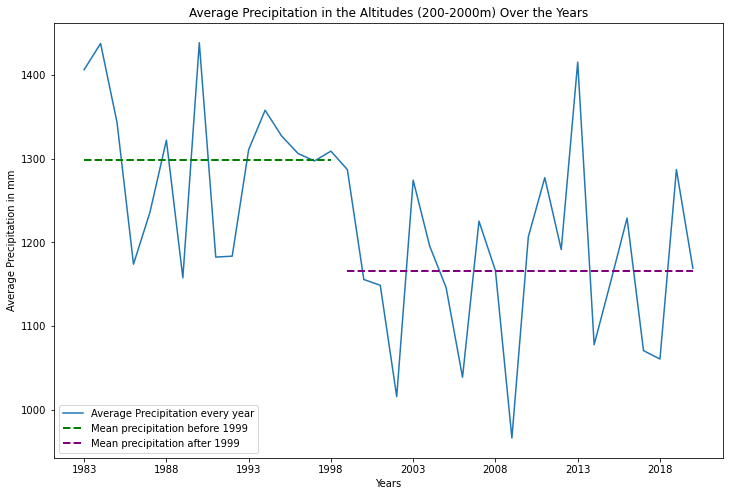

In [87]:
# Elevation (200-2000m) - Average precipitation before and after change point 
data = final_results['class_2']['avg_precip']
h, cp, p, U, mu = hg.pettitt_test(data)

df = pd.DataFrame(final_results['class_2']['avg_precip'], columns=['avg_precipitation'])
df['year'] = years


after_change_x = []
after_change_y = []
before_change_x = []
before_change_y = []
for i in years :
    if int(i) >= 1983+cp-1 :
        after_change_x.append(i)
        after_change_y.append(mu[1])
    else :
        before_change_x.append(i)
        before_change_y.append(mu[0])
df.plot(x = 'year', y = 'avg_precipitation', 
        title ='Average Precipitation in the Altitudes (200-2000m) Over the Years', 
        xlabel = 'Years', ylabel = 'Average Precipitation in mm',
        figsize=(12,8))
plt.plot(before_change_x, before_change_y, color='green', lw=2, ls='--', label="Mean precipitation before 1999")
plt.plot(after_change_x, after_change_y, color='purple', lw=2, ls='--', label="Mean precipitation after 1999")
plt.legend(['Average Precipitation every year', 'Mean precipitation before 1999', 'Mean precipitation after 1999'])
plt.savefig("Class_2.pdf")

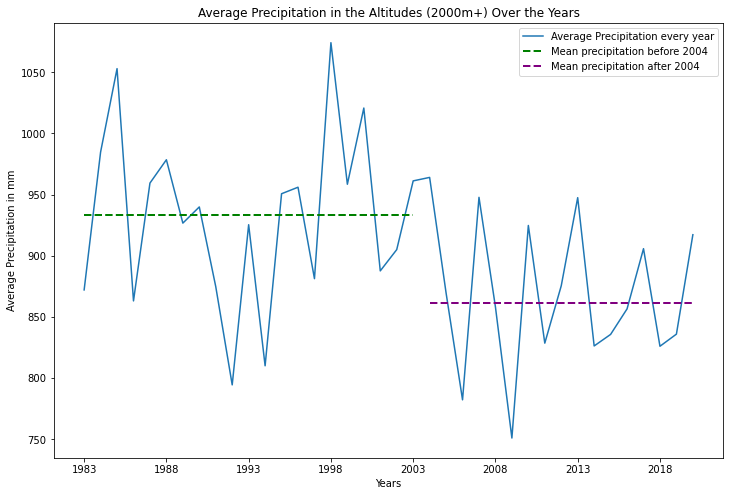

In [88]:
# Elevation (2000+m) - Average precipitation before and after change point 
data = final_results['class_3']['avg_precip']
h, cp, p, U, mu = hg.pettitt_test(data)

df = pd.DataFrame(final_results['class_3']['avg_precip'], columns=['avg_precipitation'])
df['year'] = years


after_change_x = []
after_change_y = []
before_change_x = []
before_change_y = []
for i in years :
    if int(i) >= 1983+cp-1 :
        after_change_x.append(i)
        after_change_y.append(mu[1])
    else :
        before_change_x.append(i)
        before_change_y.append(mu[0])
df.plot(x = 'year', y = 'avg_precipitation', 
        title ='Average Precipitation in the Altitudes (2000m+) Over the Years', 
        xlabel = 'Years', ylabel = 'Average Precipitation in mm',
        figsize=(12,8))
plt.plot(before_change_x, before_change_y, color='green', lw=2, ls='--', label="Mean precipitation before 2004")
plt.plot(after_change_x, after_change_y, color='purple', lw=2, ls='--', label="Mean precipitation after 2004")
plt.legend(['Average Precipitation every year', 'Mean precipitation before 2004', 'Mean precipitation after 2004'])
plt.savefig("Class_3.pdf")